In [278]:
STUDENT_ID = '20811152_BUSI4371_2526'

In [279]:
import pandas as pd

In [280]:
df = pd.read_csv('cwk_data_20811152.csv')

In [281]:
print(df.head())
print('===================')
print(f'|Shape: {df.shape}|')
print('===================')

   age          job   marital  education default  balance housing loan  \
0   40   management   married   tertiary      no      -17     yes  yes   
1   55   management  divorced   tertiary      no     2037      no   no   
2   34      student    single    unknown      no     1011      no   no   
3   39   technician   married  secondary      no     4101     yes   no   
4   26  blue-collar    single  secondary      no     1006     yes   no   

    contact  day  duration  campaign  pdays  previous poutcome    y  
0  cellular   11       474         1    256         1  success  yes  
1  cellular    4       305         2     94         3  success  yes  
2  cellular    1       253         1     -1         0  unknown  yes  
3  cellular   18       146         2    264         1    other  yes  
4  cellular   14       667         1     -1         0  unknown  yes  
|Shape: (4000, 16)|


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   job        4000 non-null   object
 2   marital    4000 non-null   object
 3   education  4000 non-null   object
 4   default    4000 non-null   object
 5   balance    4000 non-null   int64 
 6   housing    4000 non-null   object
 7   loan       4000 non-null   object
 8   contact    4000 non-null   object
 9   day        4000 non-null   int64 
 10  duration   4000 non-null   int64 
 11  campaign   4000 non-null   int64 
 12  pdays      4000 non-null   int64 
 13  previous   4000 non-null   int64 
 14  poutcome   4000 non-null   object
 15  y          4000 non-null   object
dtypes: int64(7), object(9)
memory usage: 500.1+ KB


In [283]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4000.0000,4000.00000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.0355,1344.92125,15.93175,293.145000,2.691500,45.795500,0.651500
std,10.7738,2662.04662,8.32742,302.032846,3.026321,104.807544,1.909309
min,18.0000,-1884.00000,1.00000,6.000000,1.000000,-1.000000,0.000000
25%,33.0000,75.00000,8.00000,112.000000,1.000000,-1.000000,0.000000
50%,39.0000,459.00000,16.00000,200.000000,2.000000,-1.000000,0.000000
75%,48.0000,1524.50000,21.00000,357.000000,3.000000,-1.000000,0.000000
max,95.0000,39098.00000,31.00000,4918.000000,33.000000,854.000000,27.000000


In [284]:
print('Missing values per column:', df.isnull().sum())

Missing values per column: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [285]:
df_01 = df.copy()

In [286]:
duplicates = df_01.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 356


In [287]:
print('shape before removing duplicates:', df_01.shape)
df_01 = df.drop_duplicates().reset_index(drop=True)
print('shape after removing duplicates:', df_01.shape)

shape before removing duplicates: (4000, 16)
shape after removing duplicates: (3644, 16)


In [288]:
print('Missing values per column:', df_01.isnull().sum())

Missing values per column: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [289]:
counts = df_01['y'].value_counts()
print('=======FREQUENCY TABLE FOR TARGET VARIABLE =======')
print('frequency:', counts)   # frequency
print()
print('=======PERCENTAGE TABLE FOR TARGET VARIABLE =======')
print('percentage:', (counts / len(df_01)) * 100) # percentage

=======FREQUENCY TABLE FOR TARGET VARIABLE =======
frequency: y
no     2919
yes     725
Name: count, dtype: int64

=======PERCENTAGE TABLE FOR TARGET VARIABLE =======
percentage: y
no     80.104281
yes    19.895719
Name: count, dtype: float64


In [290]:
ordered = df_01['y'].value_counts().reindex(['no', 'yes'])  # ordered categories

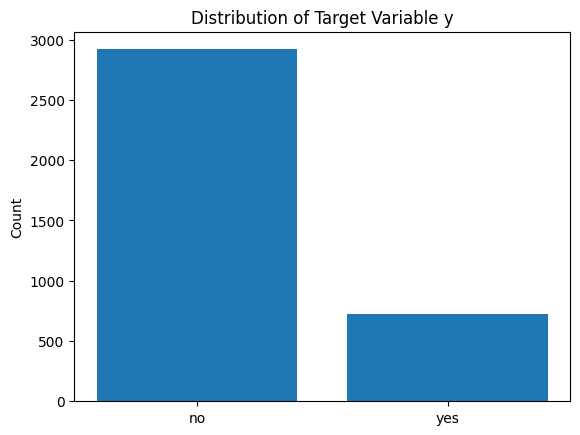

In [291]:
import matplotlib.pyplot as plt
plt.figure()
plt.bar(ordered.index, ordered.values)
plt.title('Distribution of Target Variable y')
plt.ylabel('Count')
plt.show()

NOTE: The target variable `y` is imbalanced;
no ≫ yes (roughly ~70–75% `no`, ~25–30% `yes`)

In [292]:
import numpy as np

numerical_cols = df_01.select_dtypes(include=[np.number]).columns
numerical_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [293]:
# df[numerical_cols].describe()

In [294]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4000.0,41.03550,10.773800,18.0,33.0,39.0,48.0,95.0
balance,4000.0,1344.92125,2662.046620,-1884.0,75.0,459.0,1524.5,39098.0
day,4000.0,15.93175,8.327420,1.0,8.0,16.0,21.0,31.0
duration,4000.0,293.14500,302.032846,6.0,112.0,200.0,357.0,4918.0
campaign,4000.0,2.69150,3.026321,1.0,1.0,2.0,3.0,33.0
pdays,4000.0,45.79550,104.807544,-1.0,-1.0,-1.0,-1.0,854.0
previous,4000.0,0.65150,1.909309,0.0,0.0,0.0,0.0,27.0


`.T` transposes the table (rows ↔ columns)

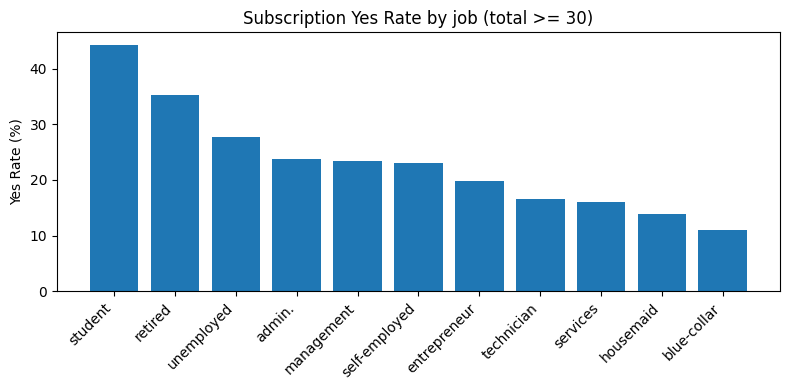

In [295]:
def plot_yes_rate(col, min_count=30):
    ct = pd.crosstab(df_01[col], df_01['y']) # ct = cross-tabulation
    ct["total"] = ct.sum(axis=1)
    ct = ct[ct["total"] >= min_count].copy()
    
    if 'yes' not in ct.columns:
        print(f'No yes column found for {col}')
        return
    
    ct['yes_rate'] = ct['yes'] / ct['total'] * 100  # percentage of yes
    ct = ct.sort_values('yes_rate', ascending=False)
    
    plt.figure(figsize = (8,4)) # 8in x 4in
    plt.bar(ct.index.astype(str), ct['yes_rate'])
    plt.title(f'Subscription Yes Rate by {col} (total >= {min_count})')
    plt.ylabel('Yes Rate (%)')
    plt.xticks(rotation=45, ha= 'right') # ha is horizontal alignment
    plt.tight_layout()
    plt.show()

plot_yes_rate('job')

In [296]:
# for col in ['job', 'marital', 'education', 'contract', 'housing', 'loan', 'default', 'poutome']:
#     if col in df_01.columns:
#         plot_yes_rate(col)

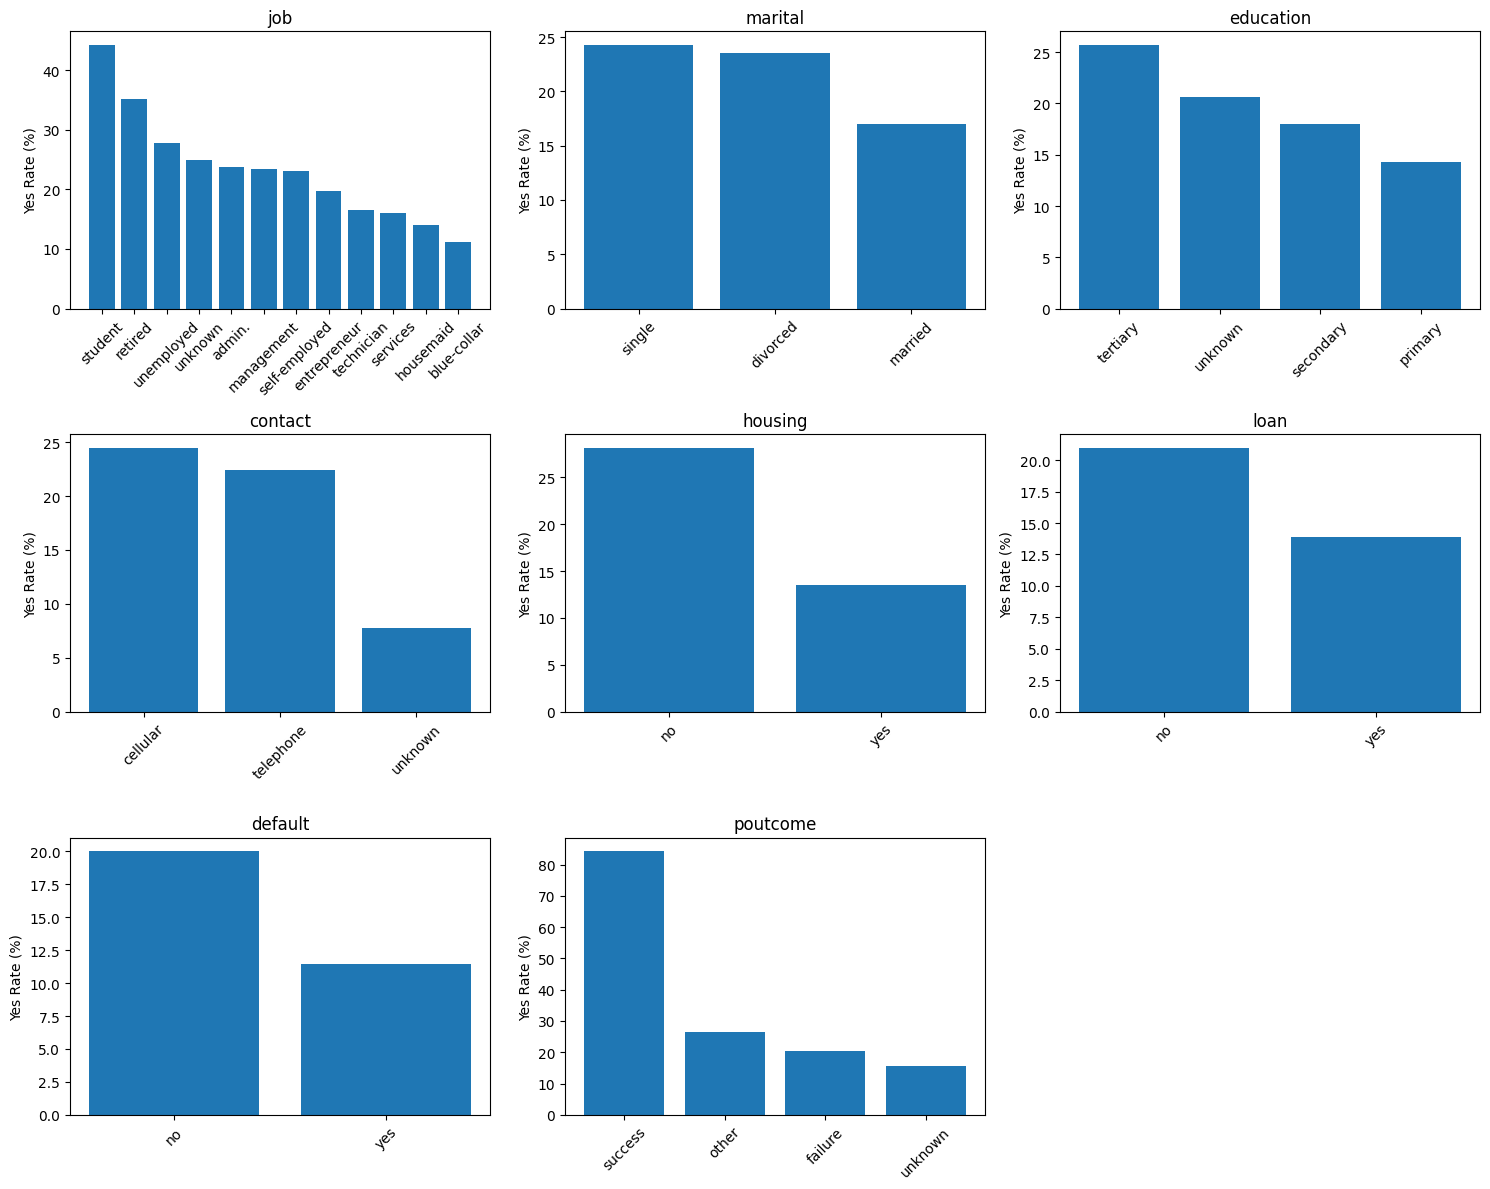

In [297]:
cols = ['job', 'marital', 'education', 'contact', 'housing', 'loan', 'default', 'poutcome']
cols = [c for c in cols if c in df_01.columns]

n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

axes = axes.flatten()

for ax, col in zip(axes, cols):
    ct = pd.crosstab(df_01[col], df_01['y'])
    ct["total"] = ct.sum(axis=1)
    ct['yes_rate'] = ct['yes'] / ct['total'] * 100
    ct = ct.sort_values('yes_rate', ascending=False)

    ax.bar(ct.index.astype(str), ct['yes_rate'])
    ax.set_title(col)
    ax.set_ylabel('Yes Rate (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')

# Hide unused plots
for ax in axes[len(cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()


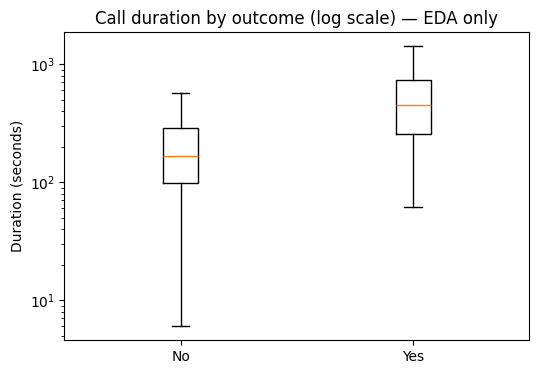

Median duration for No: 167.0
Median duration for Yes: 447.0


In [298]:
if "duration" in df_01.columns:
    yes = df_01.loc[df_01["y"] == "yes", "duration"]
    no  = df_01.loc[df_01["y"] == "no", "duration"]

    plt.figure(figsize=(6,4))
    plt.boxplot([no, yes], tick_labels=["No", "Yes"], showfliers=False)
    plt.yscale("log")
    plt.title("Call duration by outcome (log scale) — EDA only")
    plt.ylabel("Duration (seconds)")
    plt.show()

    print("Median duration for No:", float(no.median()))
    print("Median duration for Yes:", float(yes.median()))


In [299]:
# NOTE: duration is predictive but not known before calls.

y = (df_01['y'] == 'yes').astype(int)  # 1 for yes, 0 for no

drop_cols = ['y']
if 'duration' in df_01.columns:
    drop_cols.append('duration')  # drop duration as it's not known before calls

In [300]:
X = df_01.drop(columns=drop_cols)

cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f'Numeric: {num_features}')
print(f'Categorical: {cat_features}')

Numeric: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']


In [301]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    ]
)


In [302]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

tree_explore = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=50,
    random_state=42
)

tree_explore_pipe = Pipeline([
    ("prep", preprocess),
    ("model", tree_explore)
])

tree_explore_pipe.fit(X, y)
print("Decision Tree (exploration) trained.")


Decision Tree (exploration) trained.


In [303]:
# Get feature names after preprocessing
feature_names = tree_explore_pipe.named_steps["prep"].get_feature_names_out()

# Get importances from the trained tree
importances = tree_explore_pipe.named_steps["model"].feature_importances_

imp_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

imp_df.head(6)


,feature,importance
36,cat__poutcome_success,0.783662
33,cat__contact_unknown,0.113694
28,cat__housing_yes,0.091156
1,num__balance,0.011488
0,num__age,0.000000
26,cat__default_yes,0.000000


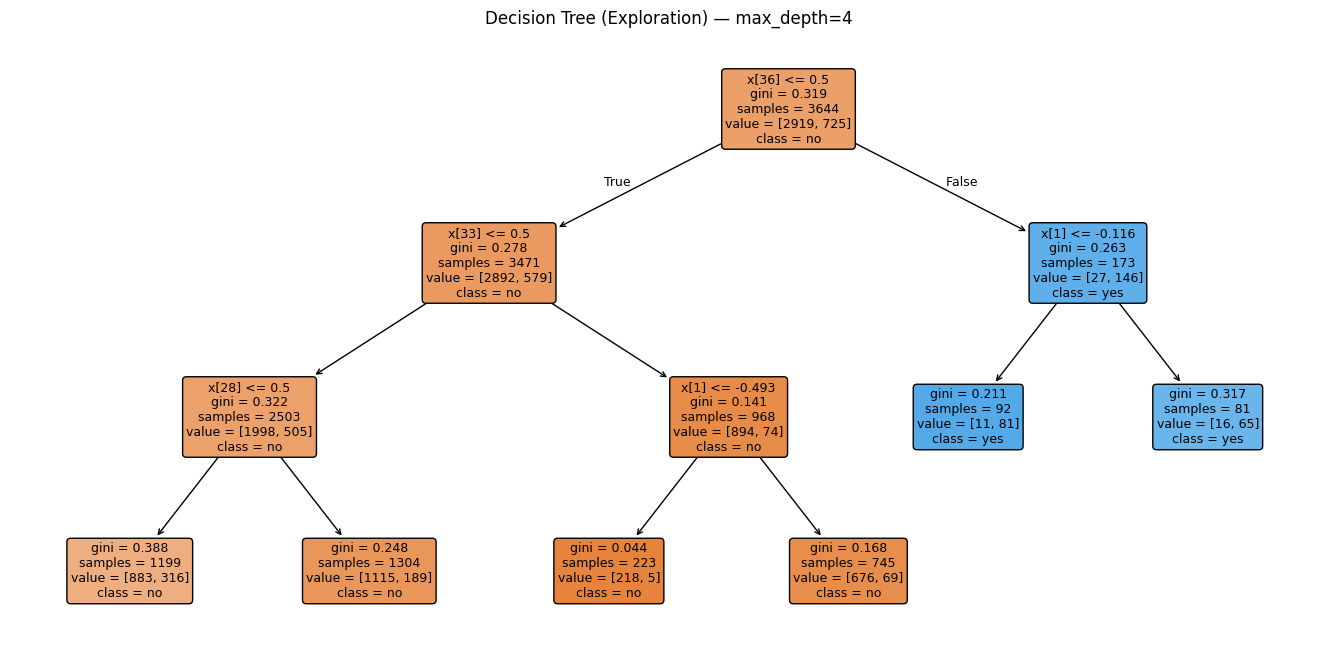

In [304]:
from sklearn.tree import plot_tree

plt.figure(figsize=(17, 8))
plot_tree(
    tree_explore_pipe.named_steps["model"],
    feature_names=None,   # we’ll handle names in next cell for importance
    class_names=["no", "yes"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree (Exploration) — max_depth=4")
plt.show()


In [305]:
ohe = tree_explore_pipe.named_steps["prep"].named_transformers_["cat"] # Get one-hot encoded feature names  
ohe_names = ohe.get_feature_names_out(cat_features)

feature_names = np.concatenate([num_features, ohe_names])


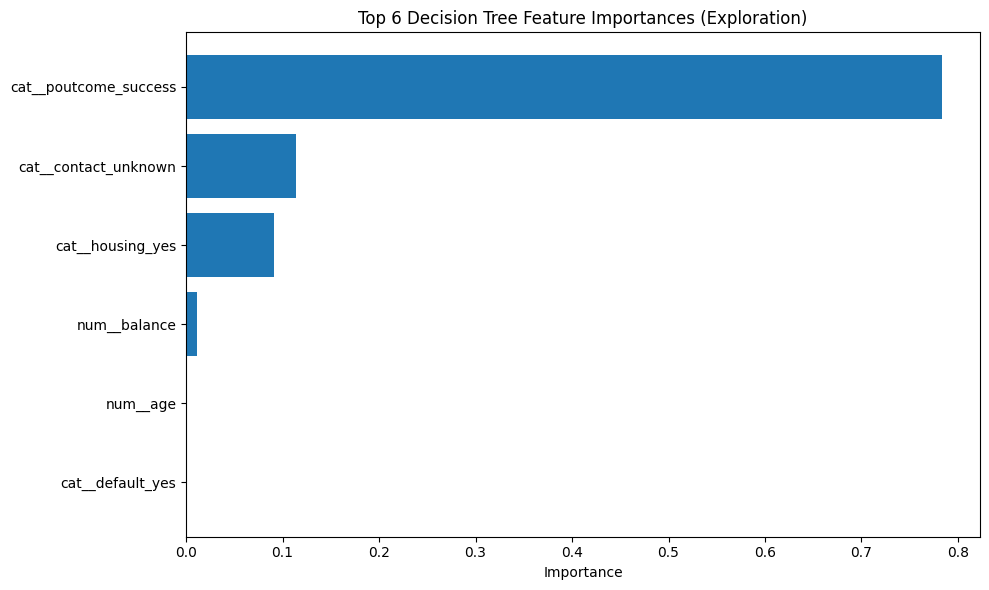

In [306]:
top = imp_df.head(6).copy()

plt.figure(figsize=(10, 6))
plt.barh(top["feature"][::-1], top["importance"][::-1])
plt.title("Top 6 Decision Tree Feature Importances (Exploration)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [307]:
from sklearn.tree import export_text

rules = export_text(
    tree_explore_pipe.named_steps["model"],
    feature_names=list(feature_names),
    max_depth=4
)
print(rules)


|--- poutcome_success <= 0.50
|   |--- contact_unknown <= 0.50
|   |   |--- housing_yes <= 0.50
|   |   |   |--- class: 0
|   |   |--- housing_yes >  0.50
|   |   |   |--- class: 0
|   |--- contact_unknown >  0.50
|   |   |--- balance <= -0.49
|   |   |   |--- class: 0
|   |   |--- balance >  -0.49
|   |   |   |--- class: 0
|--- poutcome_success >  0.50
|   |--- balance <= -0.12
|   |   |--- class: 1
|   |--- balance >  -0.12
|   |   |--- class: 1



In [308]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

models = {
    "Baseline (Most Frequent)": DummyClassifier(strategy="most_frequent"),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, min_samples_leaf=10, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=25)
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # stratified k-fold cross-validation


In [309]:
results = []

def plot_cm(cm, title, cmap=plt.cm.Blues):
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.xticks([0,1], ["Pred 0", "Pred 1"])
    plt.yticks([0,1], ["True 0", "True 1"])
    for (i,j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha="center", va="center")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


Baseline (Most Frequent)
Confusion matrix:
 [[2919    0]
 [ 725    0]]
              precision    recall  f1-score   support

       no(0)       0.80      1.00      0.89      2919
      yes(1)       0.00      0.00      0.00       725

    accuracy                           0.80      3644
   macro avg       0.40      0.50      0.44      3644
weighted avg       0.64      0.80      0.71      3644



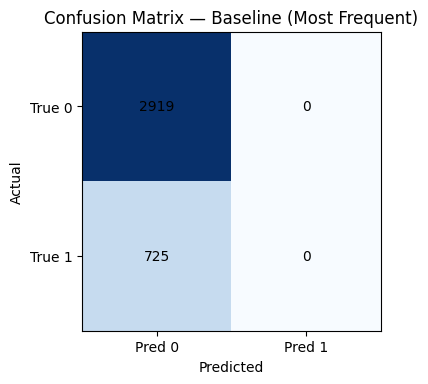


Logistic Regression
Confusion matrix:
 [[2885   34]
 [ 574  151]]
              precision    recall  f1-score   support

       no(0)       0.83      0.99      0.90      2919
      yes(1)       0.82      0.21      0.33       725

    accuracy                           0.83      3644
   macro avg       0.83      0.60      0.62      3644
weighted avg       0.83      0.83      0.79      3644



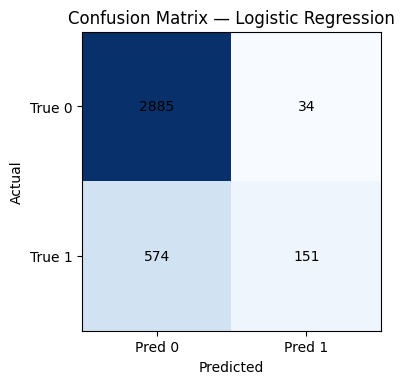


Decision Tree
Confusion matrix:
 [[2846   73]
 [ 543  182]]
              precision    recall  f1-score   support

       no(0)       0.84      0.97      0.90      2919
      yes(1)       0.71      0.25      0.37       725

    accuracy                           0.83      3644
   macro avg       0.78      0.61      0.64      3644
weighted avg       0.81      0.83      0.80      3644



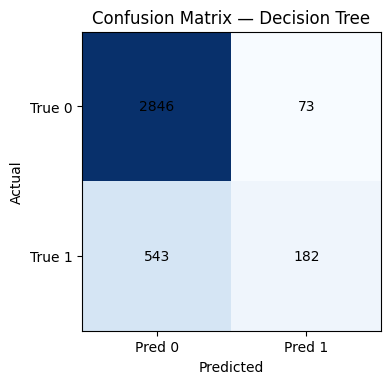


Random Forest
Confusion matrix:
 [[2874   45]
 [ 565  160]]
              precision    recall  f1-score   support

       no(0)       0.84      0.98      0.90      2919
      yes(1)       0.78      0.22      0.34       725

    accuracy                           0.83      3644
   macro avg       0.81      0.60      0.62      3644
weighted avg       0.82      0.83      0.79      3644



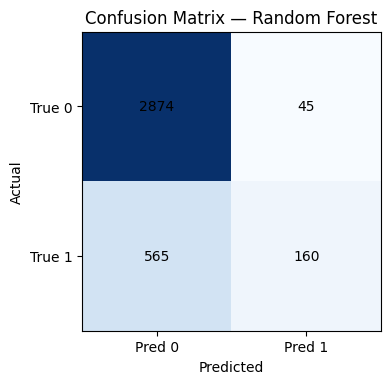


Naive Bayes
Confusion matrix:
 [[2386  533]
 [ 375  350]]
              precision    recall  f1-score   support

       no(0)       0.86      0.82      0.84      2919
      yes(1)       0.40      0.48      0.44       725

    accuracy                           0.75      3644
   macro avg       0.63      0.65      0.64      3644
weighted avg       0.77      0.75      0.76      3644



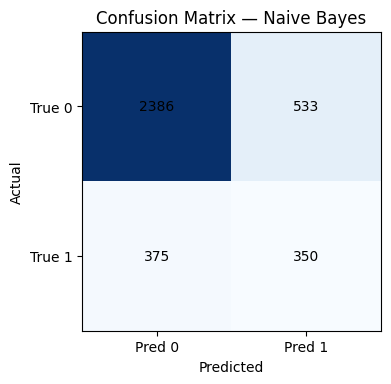


KNN
Confusion matrix:
 [[2878   41]
 [ 579  146]]
              precision    recall  f1-score   support

       no(0)       0.83      0.99      0.90      2919
      yes(1)       0.78      0.20      0.32       725

    accuracy                           0.83      3644
   macro avg       0.81      0.59      0.61      3644
weighted avg       0.82      0.83      0.79      3644



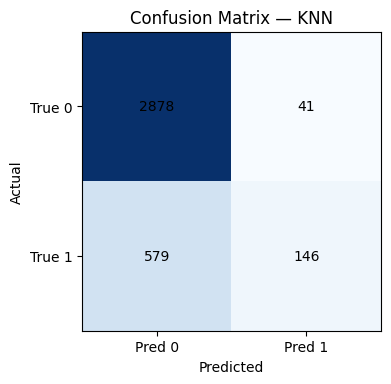

In [310]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

for name, model in models.items():
    pipe = Pipeline([("prep", preprocess), ("model", model)])

    y_pred = cross_val_predict(pipe, X, y, cv=cv, method="predict")
    cm = confusion_matrix(y, y_pred)

    prec, rec, f1, _ = precision_recall_fscore_support(y, y_pred, average="binary", zero_division=0)
    acc = (cm[0,0] + cm[1,1]) / cm.sum()

    results.append([name, acc, prec, rec, f1, cm[0,0], cm[0,1], cm[1,0], cm[1,1]])

    print("\n" + "="*70)
    print(name)
    print("Confusion matrix:\n", cm)
    print(classification_report(y, y_pred, target_names=["no(0)", "yes(1)"], zero_division=0))
    plot_cm(cm, f"Confusion Matrix — {name}")

In [311]:
results_df = pd.DataFrame(results, columns=[
    "model","accuracy","precision_yes","recall_yes","f1_yes","tn","fp","fn","tp"
]).sort_values(["f1_yes","recall_yes"], ascending=False)

In [312]:
results_df

,model,accuracy,precision_yes,recall_yes,f1_yes,tn,fp,fn,tp
4,Naive Bayes,0.750823,0.396376,0.482759,0.435323,2386,533,375,350
2,Decision Tree,0.830955,0.713725,0.251034,0.371429,2846,73,543,182
3,Random Forest,0.832602,0.780488,0.220690,0.344086,2874,45,565,160
1,Logistic Regression,0.833150,0.816216,0.208276,0.331868,2885,34,574,151
5,KNN,0.829857,0.780749,0.201379,0.320175,2878,41,579,146
0,Baseline (Most Frequent),0.801043,0.000000,0.000000,0.000000,2919,0,725,0


In [313]:
best = results_df.iloc[0]
best_name = best["model"]
print("Best model (by F1 then recall):", best_name)


best

Best model (by F1 then recall): Naive Bayes


model            Naive Bayes
accuracy            0.750823
precision_yes       0.396376
recall_yes          0.482759
f1_yes              0.435323
tn                      2386
fp                       533
fn                       375
tp                       350
Name: 4, dtype: object

In [314]:
final_model = models[best_name]
final_pipe = Pipeline([("prep", preprocess), ("model", final_model)])
final_pipe.fit(X, y)

print("Final model trained on full dataset (duration excluded).")


Final model trained on full dataset (duration excluded).


In [315]:
import joblib
joblib.dump(final_pipe, f"{STUDENT_ID}_final_model.joblib")
print(f"Saved: {STUDENT_ID}_final_model.joblib")

Saved: 20811152_BUSI4371_2526_final_model.joblib


In [316]:
import pandas as pd
import numpy as np
import joblib

def predict_new(csv_path, model_path=f"{STUDENT_ID}_final_model.joblib"):
    model = joblib.load(model_path)
    new_df = pd.read_csv(csv_path)

    # drop target if present
    if "y" in new_df.columns:
        new_df = new_df.drop(columns=["y"])

    # drop duration if present (coursework rule)
    if "duration" in new_df.columns:
        new_df = new_df.drop(columns=["duration"])

    pred = model.predict(new_df)

    out = new_df.copy()
    out["pred_yes"] = pred.astype(int)

    if hasattr(model.named_steps["model"], "predict_proba"):
        out["proba_yes"] = model.predict_proba(new_df)[:, 1]

    return out


In [317]:
# Quick sanity check: predict on the same dataset schema (dropping y + duration)
temp = df_01.copy()
if "y" in temp.columns:
    temp = temp.drop(columns=["y"])
if "duration" in temp.columns:
    temp = temp.drop(columns=["duration"])

loaded = joblib.load(f"{STUDENT_ID}_final_model.joblib")
loaded.predict(temp.head(5))


array([1, 1, 1, 1, 0])

In [318]:
csv_path = "cwk_data_20796894-paras.csv"  # CHANGE THIS to your new data path
# csv_path = "cwk_data_20811152.csv"  
# csv_path = "Rohit_cwk_data_20793079.csv"  


result = predict_new(csv_path)


In [319]:
print("Sample predictions:") 
display(result.head())  # first few predictions

Sample predictions:


,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,poutcome,pred_yes,proba_yes
0,31,technician,married,secondary,no,684,yes,no,cellular,7,3,-1,0,unknown,0,6.341229e-03
1,45,technician,single,tertiary,no,2033,no,no,cellular,15,5,285,2,success,1,1.000000e+00
2,25,blue-collar,single,secondary,no,189,no,yes,cellular,8,2,-1,0,unknown,0,1.300770e-03
3,62,retired,married,primary,no,1084,no,no,cellular,14,1,-1,0,unknown,1,9.730466e-01
4,35,technician,single,secondary,no,344,no,no,cellular,27,16,-1,0,unknown,0,7.513659e-11


In [320]:
result_yes = result[result["pred_yes"] == 1] # customers predicted as YES
print("\nPredicted YES (top 5):")
display(result_yes.head())



Predicted YES (top 5):


,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,poutcome,pred_yes,proba_yes
1,45,technician,single,tertiary,no,2033,no,no,cellular,15,5,285,2,success,1,1.000000
3,62,retired,married,primary,no,1084,no,no,cellular,14,1,-1,0,unknown,1,0.973047
5,30,management,single,tertiary,no,4808,no,no,cellular,10,1,-1,0,unknown,1,0.556574
6,35,student,married,tertiary,no,387,yes,no,cellular,8,3,347,3,failure,1,1.000000
8,37,technician,married,secondary,no,432,yes,no,cellular,6,3,776,55,failure,1,1.000000


In [321]:
result_sorted = result.sort_values("proba_yes", ascending=False) # top 20 customers by probability
print("\nTop 20 customers by probability:")
display(result_sorted.head(20))



Top 20 customers by probability:


,age,job,marital,education,default,balance,housing,loan,contact,day,campaign,pdays,previous,poutcome,pred_yes,proba_yes
773,29,admin.,single,secondary,no,464,no,no,cellular,9,2,91,3,success,1,1.0
149,43,management,divorced,tertiary,no,2367,no,no,cellular,22,2,181,4,success,1,1.0
506,34,management,married,tertiary,no,3301,yes,no,cellular,17,5,92,6,success,1,1.0
3757,45,blue-collar,married,primary,no,1265,yes,no,cellular,11,8,299,1,success,1,1.0
494,56,management,married,unknown,no,4623,no,no,cellular,25,1,192,1,success,1,1.0
491,61,retired,married,secondary,no,11,no,no,cellular,29,1,92,3,success,1,1.0
128,31,management,single,tertiary,no,147,no,no,cellular,9,1,181,2,success,1,1.0
489,72,retired,married,primary,no,4657,no,no,cellular,22,3,309,5,success,1,1.0
486,35,student,single,secondary,no,188,yes,no,cellular,5,1,78,8,success,1,1.0
484,30,student,single,secondary,no,1681,no,no,cellular,23,1,106,2,success,1,1.0


In [322]:
print("\nPrediction counts:")
print(f'\nPrediction counts:{result["pred_yes"].value_counts()}') # print count of predictions


Prediction counts:

Prediction counts:pred_yes
0    3067
1     933
Name: count, dtype: int64


In [323]:
yes_percentage = result["pred_yes"].mean() * 100
print(f"\nPercentage predicted YES: {yes_percentage:.2f}%") # print percentage predicted YES


Percentage predicted YES: 23.33%
